In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")



In [3]:
#Preprocessing data

train_features = df_train.copy()
test_features = df_test.copy()

#dealing with missing data  (drop cabin column)
train_features.drop("Cabin", axis = 1, inplace = True)
test_features.drop("Cabin", axis = 1, inplace = True)

# impute mean value for the columns Age and Fare
train_features.Age.fillna(train_features.Age.mean(), inplace = True)
train_features.Fare.fillna(train_features.Fare.mean(), inplace = True)
test_features.Age.fillna(test_features.Age.mean(), inplace = True)
test_features.Fare.fillna(test_features.Fare.mean(), inplace = True)

#impute with the most common class for "Embarked" column
train_features.Embarked.fillna("S", inplace = True)
test_features.Embarked.fillna("S", inplace = True)

#label encoding
train_features["Embarked"] = train_features["Embarked"].map({"C":1,  "S": 2,  "Q":3})
train_features["Sex"] = train_features["Sex"].map({"male" :0,  "female": 1})
test_features["Embarked"] = test_features["Embarked"].map({"C":1,  "S": 2,  "Q":3})
test_features["Sex"] = test_features["Sex"].map({"male" :0,  "female": 1})


#Feature Extraction (SibSp& Parch columns are highly correlated, we make just one feature by merging them)
train_features["Alone"] = train_features["SibSp"] + train_features["Parch"]
train_features["Alone"] = train_features["Alone"].apply(lambda x : 1 if x==0 else 0) 
#if any row in the alone column is zero, then alone status is 1; else  it is zero.
train_features.drop(["SibSp", "Parch"], axis = 1, inplace = True)
test_features["Alone"] = test_features["SibSp"] + test_features["Parch"]
test_features["Alone"] = test_features["Alone"].apply(lambda x : 1 if x==0 else 0) 
#if any row in the alone column is zero, then alone status is 1; else  it is zero.
test_features.drop(["SibSp", "Parch"], axis = 1, inplace = True)
#Feature Engineering: we create a new feature from names column
train_features["Title"] = train_features["Name"].str.extract("([A-Za-z]+)\.", expand = False)
train_features.drop("Name", axis = 1,  inplace = True)
test_features["Title"] = test_features["Name"].str.extract("([A-Za-z]+)\.", expand = False)
test_features.drop("Name", axis = 1,  inplace = True)

train_features.drop("PassengerId", axis = 1,  inplace = True)
train_features.drop("Ticket", axis = 1,  inplace = True)
test_features.drop("PassengerId", axis = 1,  inplace = True)
test_features.drop("Ticket", axis = 1,  inplace = True)


least_occuring = ["Dr", "Rev", "Col", "Major", "Mlle", "Lady", "Sir", "Don", "Jonkheer", "Mme", "Capt", "Ms", "Countess"]
train_features["Title"] = train_features["Title"].replace(least_occuring, "Rare")
test_features["Title"] = test_features["Title"].replace(least_occuring, "Rare")

train_features["Title"] = train_features["Title"].map({ "Mr" : 5,  "Miss": 4, "Mrs" :3 , "Master" :2 ,  "Rare" : 1})
test_features["Title"] = test_features["Title"].map({ "Mr" : 5,  "Miss": 4, "Mrs" :3 , "Master" :2 ,  "Rare" : 1})


test_features.Title.fillna("5", inplace = True)

#binning age column

train_features.loc[train_features["Age"] <= 20, "Age" ] = 1
train_features.loc[(train_features["Age"] > 20 ) & (train_features["Age"] <=40 ),  "Age" ] = 2
train_features.loc[(train_features["Age"] > 40 ) & (train_features["Age"] <=60 ),  "Age" ] = 3
train_features.loc[train_features["Age"] >=  60, "Age" ] = 4
                                                    

test_features.loc[test_features["Age"] <= 20, "Age" ] = 1
test_features.loc[(test_features["Age"] > 20) & (test_features["Age"] <=40 ),  "Age" ] = 2
test_features.loc[(test_features["Age"] > 40 ) & (test_features["Age"] <=60 ),  "Age" ] = 3
test_features.loc[test_features["Age"] >=  60, "Age" ] = 4

                                                        
X_train = train_features.drop("Survived", axis = 1)
y_train = train_features.pop("Survived")

X_test = test_features


In [4]:
#from sklearn.model_selection import train_test_split

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.BatchNormalization(input_shape = (7, )),
  layers.Dense(256, "relu"),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Dense(128, "relu"),  
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Dense(64,  "relu"),
  layers.Dense(32, "relu"),
  layers.Dense(1,  "sigmoid"), 
    
])

model.summary()



model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["acc"])

history = model.fit(X_train, y_train,   batch_size = 16, verbose = 1, epochs = 300)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 7)                 28        
_________________________________________________________________
dense (Dense)                (None, 256)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               5

56/56 [==============================] - 0s 5ms/step - loss: 0.4080 - acc: 0.8277
Epoch 70/300
56/56 [==============================] - 0s 6ms/step - loss: 0.3835 - acc: 0.8363
Epoch 71/300
56/56 [==============================] - 0s 5ms/step - loss: 0.3559 - acc: 0.8519
Epoch 72/300
56/56 [==============================] - 0s 6ms/step - loss: 0.3822 - acc: 0.8338
Epoch 73/300
56/56 [==============================] - 0s 6ms/step - loss: 0.3839 - acc: 0.8343
Epoch 74/300
56/56 [==============================] - 0s 5ms/step - loss: 0.3766 - acc: 0.8475
Epoch 75/300
56/56 [==============================] - 0s 3ms/step - loss: 0.3487 - acc: 0.8331
Epoch 76/300
56/56 [==============================] - 0s 4ms/step - loss: 0.3940 - acc: 0.8343
Epoch 77/300
56/56 [==============================] - 0s 4ms/step - loss: 0.3890 - acc: 0.8396
Epoch 78/300
56/56 [==============================] - 0s 4ms/step - loss: 0.3660 - acc: 0.8581
Epoch 79/300
56/56 [==============================] - 0s 4ms/st

56/56 [==============================] - 0s 4ms/step - loss: 0.3541 - acc: 0.8495
Epoch 155/300
56/56 [==============================] - 0s 4ms/step - loss: 0.3495 - acc: 0.8407
Epoch 156/300
56/56 [==============================] - 0s 3ms/step - loss: 0.3465 - acc: 0.8622
Epoch 157/300
56/56 [==============================] - 0s 3ms/step - loss: 0.3661 - acc: 0.8351
Epoch 158/300
56/56 [==============================] - 0s 3ms/step - loss: 0.3459 - acc: 0.8523
Epoch 159/300
56/56 [==============================] - 0s 3ms/step - loss: 0.3522 - acc: 0.8366
Epoch 160/300
56/56 [==============================] - 0s 3ms/step - loss: 0.3678 - acc: 0.8121
Epoch 161/300
56/56 [==============================] - 0s 3ms/step - loss: 0.3290 - acc: 0.8571
Epoch 162/300
56/56 [==============================] - 0s 3ms/step - loss: 0.3902 - acc: 0.8168
Epoch 163/300
56/56 [==============================] - 0s 3ms/step - loss: 0.3707 - acc: 0.8136
Epoch 164/300
56/56 [==============================] -

56/56 [==============================] - 0s 4ms/step - loss: 0.3386 - acc: 0.8493
Epoch 240/300
56/56 [==============================] - 0s 4ms/step - loss: 0.3272 - acc: 0.8683
Epoch 241/300
56/56 [==============================] - 0s 4ms/step - loss: 0.3557 - acc: 0.8481
Epoch 242/300
56/56 [==============================] - 0s 4ms/step - loss: 0.3880 - acc: 0.8355
Epoch 243/300
56/56 [==============================] - 0s 4ms/step - loss: 0.3468 - acc: 0.8430
Epoch 244/300
56/56 [==============================] - 0s 4ms/step - loss: 0.3475 - acc: 0.8584
Epoch 245/300
56/56 [==============================] - 0s 5ms/step - loss: 0.3760 - acc: 0.8338
Epoch 246/300
56/56 [==============================] - 0s 6ms/step - loss: 0.3693 - acc: 0.8544
Epoch 247/300
56/56 [==============================] - 0s 8ms/step - loss: 0.3203 - acc: 0.8623
Epoch 248/300
56/56 [==============================] - 0s 6ms/step - loss: 0.3608 - acc: 0.8331
Epoch 249/300
56/56 [==============================] -

# learning curves
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

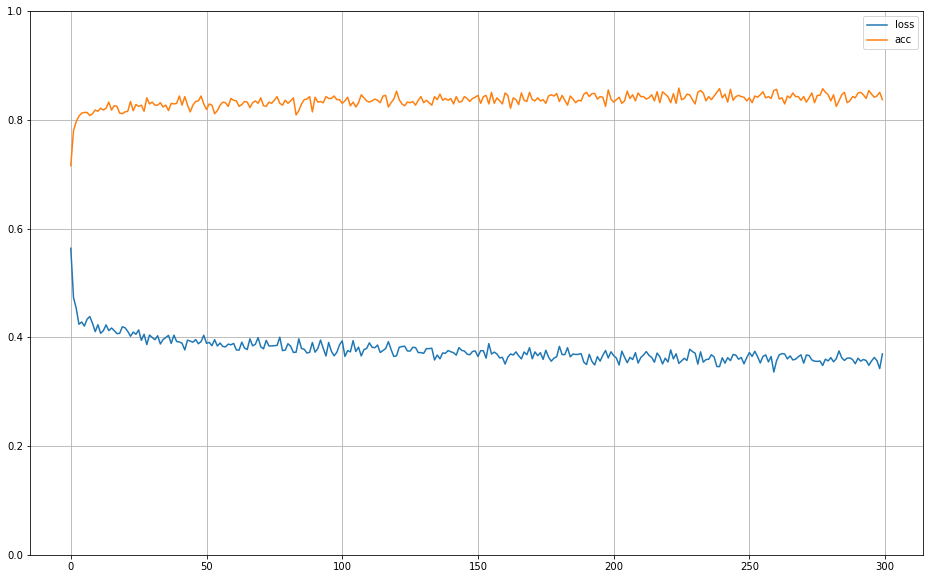

In [6]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True) 
plt.gca().set_ylim(0, 1)
plt.show()

In [7]:
import tensorflow as tf
#Considering y variable holds numpy array
test_tensor = tf.convert_to_tensor(X_test, dtype=tf.int64) 

predictions = model.predict(test_tensor)

predictions = (predictions >= 0.5).astype(int).ravel()

print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1]


In [8]:
submit = pd.DataFrame({"PassengerId": df_test.PassengerId, "Survived" : predictions})
submit.to_csv("kaggle_submission.csv", index = False )
print("Your submission was successfully saved!")

Your submission was successfully saved!
